# Example 2: Multiple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [37]:
np.random.seed(1337)
np.set_printoptions(3)

In [22]:
w_true = np.array([1.5, 1.0])
b_true = 3.0
noise_scale = 1.0

n_samples = 100
n_features = len(w_true)
x = np.random.randn(n_samples, n_features)

noise = noise_scale * np.random.randn(n_samples)
t = x @ w_true + b_true + noise

In [23]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2)
print(f'{x_train.shape=}, {t_train.shape=}')
print(f'{x_test.shape=}, {t_test.shape=}')

x_train.shape=(80, 2), t_train.shape=(80,)
x_test.shape=(20, 2), t_test.shape=(20,)


In [24]:
model = LinearRegression()
model.fit(x_train, t_train)

LinearRegression()

In [30]:
y_test = model.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)

w_pred = model.coef_
b_pred = model.intercept_

## NOTE: Don't worry about the plotting code below—just focus on understanding the plot.

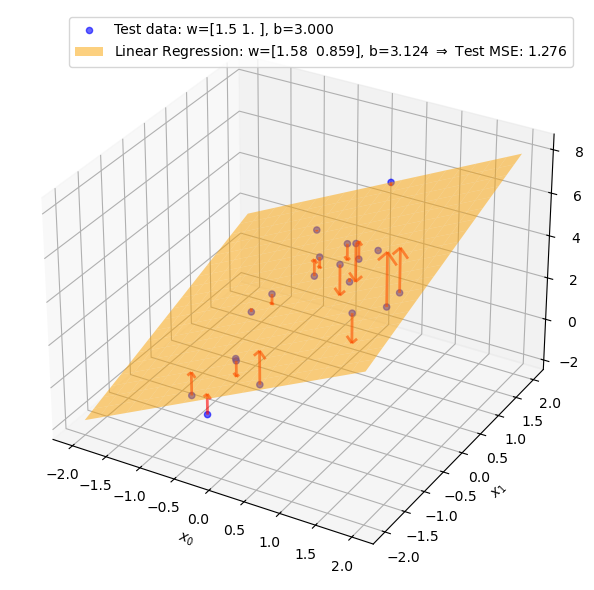

In [47]:
data_label = f'Test data: w={w_true}, b={b_true:.3f}'
model_label = rf'Linear Regression: w={w_pred}, b={b_pred.item():.3f} $\Rightarrow$ Test MSE: {mse_test:.3f}'

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test[:, 0], x_test[:, 1], t_test, color='blue', label=data_label, alpha=0.6)

# Plot predicted plane
x0_range = np.linspace(-2, 2, 20)
x1_range = np.linspace(-2, +2, 20)
x0_grid, x1_grid = np.meshgrid(x0_range, x1_range)
x_grid = np.c_[x0_grid.ravel(), x1_grid.ravel()]

y_grid = model.predict(x_grid)
y_grid = y_grid.reshape(x0_grid.shape)
error_test = y_test - t_test

# model's prediction plane
ax.plot_surface(x0_grid, x1_grid, y_grid, alpha=0.5, color='orange', label=model_label)

# Add error bars as vertical lines (quivers)
ax.quiver(
    # The x, y and z coordinates of the arrow locations
    X=x_test[:, 0],
    Y=x_test[:, 1],
    Z=t_test, # Start point: at predicted z
    # The x, y and z components of the arrow vectors.
    U=0,
    V=0,
    W=error_test,
    length=1.0,
    normalize=False,
    color='red',
    alpha=0.6,
    linewidth=2,
    arrow_length_ratio=0.2
)


ax.set_xlabel(r'$x_{0}$')
ax.set_ylabel(r'$x_{1}$')
ax.set_zlabel(r'$t$')
ax.legend()
fig.tight_layout()